In [12]:
import os
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
os.getcwd()

'/Users/timchristy/Desktop/agriculture-price-analysis/notebooks/01_exploration'

In [14]:
path_to_data = '../../../agriculture_prices.db'

In [15]:
conn = sqlite3.connect(path_to_data)
c = conn.cursor()

In [16]:
produce_df = pd.DataFrame(c.execute('''SELECT * FROM agriculture_prices''').fetchall())

In [17]:
produce_df.columns = ['Farm Price', 'Atlanta Retail', 'Chicago Retail', 'Los Angeles Retail', 'NYC Retail', 'Avg Spread', 'Commodity', 'Date']

In [18]:
produce_df.head()

,Farm Price,Atlanta Retail,Chicago Retail,Los Angeles Retail,NYC Retail,Avg Spread,Commodity,Date
0,1.16,2.23,1.70,1.99,2.54,82.33%,Strawberries,2019-05-19
1,0.91,2.67,1.89,2.47,2.66,166.21%,Strawberries,2019-05-12
2,0.58,2.42,1.89,2.12,2.91,302.59%,Strawberries,2019-05-05
3,0.58,2.79,1.95,2.38,2.96,334.48%,Strawberries,2019-04-28
4,0.69,2.92,2.04,2.38,3.16,280.43%,Strawberries,2019-04-21


In [19]:
produce_df.tail()

,Farm Price,Atlanta Retail,Chicago Retail,Los Angeles Retail,NYC Retail,Avg Spread,Commodity,Date
213791,0.28,1.69,0.0,1.24,1.19,267.86%,Nectarines,2000-07-23
213792,0.26,1.61,0.0,1.37,1.19,300.96%,Nectarines,2000-07-16
213793,0.30,1.71,0.0,1.42,1.19,260.00%,Nectarines,2000-07-09
213794,0.33,1.96,0.0,0.92,1.04,196.97%,Nectarines,2000-07-02
213795,0.39,1.22,0.0,0.92,1.19,113.46%,Nectarines,2000-06-25


In [20]:
produce_df.index = pd.to_datetime(produce_df['Date'])

In [21]:
conn.close()

# Exploration of Prices over time. 
Will be analyzing the average price per year for each produce and maybe by month later on...

In [87]:
strawberries_df = produce_df[produce_df['Commodity'] == 'Strawberries']

In [88]:
strawberry_yearly_mean_df = strawberries_df.resample('Y').mean()

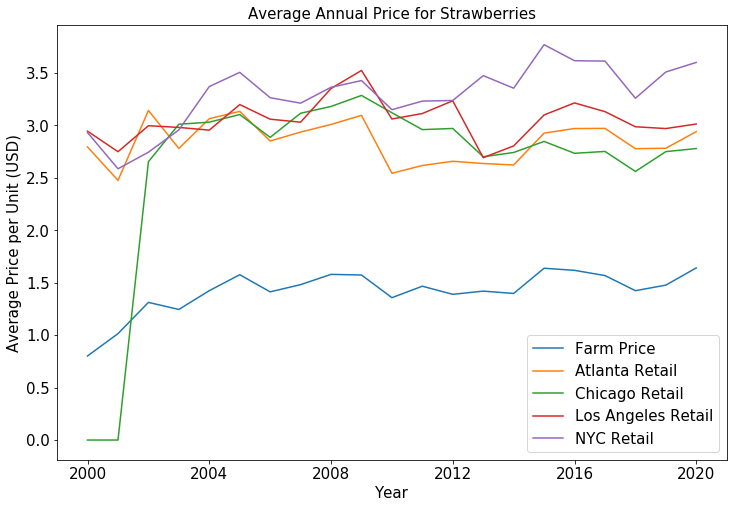

In [89]:
plt.figure(figsize=(12, 8))
plt.title('Average Annual Price for Strawberries', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Average Price per Unit (USD)', fontsize=15)
plt.yticks(fontsize=15)
plt.plot(strawberry_yearly_mean_df.index, strawberry_yearly_mean_df[:]);
plt.legend(strawberry_yearly_mean_df.columns, loc='lower right', fontsize=15)

# Problems with this graph

1. Inflation needs to be taken into account
2. It would be better to average a retail price rather than observe all of that


# Inflation
Need to adjust for inflation. The following data was gathered from [The Federal Reserve Bank of Minneapolis](https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-)


| Year |  CPI  | Annual % Change|
|------|-------|------|
| 1997 | 160.5 | 2.3% |
| 1998 | 163.0 | 1.6% |
| 1999 | 166.6 | 2.2% |
| 2000 | 172.2 | 3.4% |
| 2001 | 177.1 | 2.8% |
| 2002 | 179.9 | 1.6% |
| 2003 | 184.0 | 2.3% |
| 2004 | 188.9 | 2.7% |
| 2005 | 195.3 | 3.4% |
| 2006 | 201.6 | 3.2% |
| 2007 | 207.3 | 2.9% |
| 2008 | 215.3 | 3.8% |
| 2009 | 214.5 | -0.4%|
| 2010 | 218.1 | 1.6% |
| 2011 | 224.9 | 3.2% |
| 2012 | 229.6 | 2.1% |
| 2013 | 233.0 | 1.5% |
| 2014 | 236.7 | 1.6% |
| 2015 | 237.0 | 0.1% |
| 2016 | 240.0 | 1.3% |
| 2017 | 245.1 | 2.1% |
| 2018 | 251.1 | 2.4% |
| 2019*| 255.5 | 1.8% |

* 2019: It is still December 2019 as I write this. The average through November was calculated using the data from this website : [https://inflationdata.com/Inflation/Consumer_Price_Index/CurrentCPI.asp?reloaded=true](https://inflationdata.com/Inflation/Consumer_Price_Index/CurrentCPI.asp?reloaded=true) . 

This will be used to adjust prices to 2019 dollars

In [90]:
strawberry_yearly_mean_df.index = strawberry_yearly_mean_df.index.year

In [91]:
strawberry_yearly_mean_df

,Farm Price,Atlanta Retail,Chicago Retail,Los Angeles Retail,NYC Retail
Date,,,,,
1999,0.801500,2.794500,0.000000,2.945000,2.931500
2000,1.014545,2.475909,0.000000,2.749091,2.586364
2001,1.312439,3.142195,2.653902,2.997073,2.744634
2002,1.245238,2.780476,3.010952,2.980714,2.956667
2003,1.423922,3.063725,3.030980,2.954902,3.370196
2004,1.576400,3.133800,3.103600,3.198600,3.505800
2005,1.412941,2.851373,2.885882,3.059216,3.264118
2006,1.481633,2.936122,3.115918,3.030816,3.212041
2007,1.579423,3.009038,3.180577,3.351731,3.363269


In [92]:
strawberry_yearly_mean_df['CPI'] = [166.6, 172.2, 177.1, 179.9, 184.0, 188.9, 195.3, 201.6, 207.3, 215.3, 214.5, 218.1, 224.9, 229.6, 233.0, 236.7, 237.0, 240.0, 245.1, 251.1, 255.5]

In [93]:
strawberry_yearly_mean_df.head()

,Farm Price,Atlanta Retail,Chicago Retail,Los Angeles Retail,NYC Retail,CPI
Date,,,,,,
1999,0.801500,2.794500,0.000000,2.945000,2.931500,166.6
2000,1.014545,2.475909,0.000000,2.749091,2.586364,172.2
2001,1.312439,3.142195,2.653902,2.997073,2.744634,177.1
2002,1.245238,2.780476,3.010952,2.980714,2.956667,179.9
2003,1.423922,3.063725,3.030980,2.954902,3.370196,184.0


In [94]:
farm_price_adj = [((x[0]/x[-1]) * 255.5) for x in strawberry_yearly_mean_df.values]

In [95]:
strawberry_yearly_mean_df['2019 Adj. Farm Price'] = farm_price_adj

In [96]:
strawberry_yearly_mean_df.head()

,Farm Price,Atlanta Retail,Chicago Retail,Los Angeles Retail,NYC Retail,CPI,2019 Adj. Farm Price
Date,,,,,,,
1999,0.801500,2.794500,0.000000,2.945000,2.931500,166.6,1.229191
2000,1.014545,2.475909,0.000000,2.749091,2.586364,172.2,1.505322
2001,1.312439,3.142195,2.653902,2.997073,2.744634,177.1,1.893440
2002,1.245238,2.780476,3.010952,2.980714,2.956667,179.9,1.768529
2003,1.423922,3.063725,3.030980,2.954902,3.370196,184.0,1.977239


In [97]:
avg_retail = [((np.mean(x[1:5])/x[-2])*255.5) for x in strawberry_yearly_mean_df.values]

In [98]:
strawberry_yearly_mean_df['Avg Retail (2019 Adj)'] = avg_retail

In [100]:
strawberry_yearly_mean_df.drop(columns=['Atlanta Retail', 'Chicago Retail', 'Los Angeles Retail', 'NYC Retail', 'Farm Price', 'CPI'], inplace=True)

In [101]:
strawberry_yearly_mean_df.head()

,2019 Adj. Farm Price,Avg Retail (2019 Adj)
Date,,
1999,1.229191,3.324491
2000,1.505322,2.897508
2001,1.893440,4.161362
2002,1.768529,4.164412
2003,1.977239,4.311494


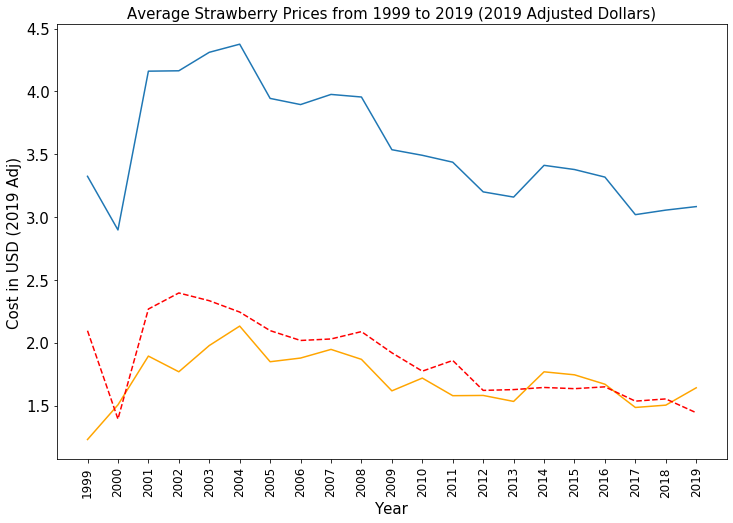

In [109]:
plt.figure(figsize=(12,8))
plt.plot(strawberry_yearly_mean_df.index, strawberry_yearly_mean_df['2019 Adj. Farm Price'], c='orange');
plt.plot(strawberry_yearly_mean_df.index, strawberry_yearly_mean_df['Avg Retail (2019 Adj)'])
plt.plot(strawberry_yearly_mean_df.index, (strawberry_yearly_mean_df['Avg Retail (2019 Adj)'] - strawberry_yearly_mean_df['2019 Adj. Farm Price']), c='red', linestyle='--')
plt.title('Average Strawberry Prices from 1999 to 2019 (2019 Adjusted Dollars)', fontsize = 15);
plt.xticks([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], fontsize=12, rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Cost in USD (2019 Adj)', fontsize=15);


In [104]:
produce_df['Commodity'].unique()

array(['Strawberries', 'Romaine Lettuce', 'Red Leaf Lettuce', 'Potatoes',
       'Oranges', 'Iceberg Lettuce', 'Green Leaf Lettuce', 'Celery',
       'Cauliflower', 'Carrots', 'Cantaloupe', 'Broccoli Crowns',
       'Avocados', 'Broccoli Bunches', 'Asparagus', 'Flame Grapes',
       'Thompson Grapes', 'Honeydews', 'Tomatoes', 'Plums', 'Peaches',
       'Nectarines'], dtype=object)